In [1]:
# E3.ipynb

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read data from Excel file
file_path = 'E3-MLR3.xlsx'
train_data = pd.read_excel(file_path, sheet_name='train')
test_data = pd.read_excel(file_path, sheet_name='test')

# Separate features and target variable in train data
X_train = train_data.drop(columns=['y'])
y_train = train_data['y']

# Separate features and target variable in test data
X_test = test_data.drop(columns=['y'])
y_test = test_data['y']

# Metric tables
metric_table_train = pd.DataFrame()
metric_table_test = pd.DataFrame()

# Use PolynomialFeatures to create features
for i in range (1, 21):
    DEGREE = i
    poly = PolynomialFeatures(degree=DEGREE)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    ####################################
    # Save the augmented data set to a file for review

    # Create dataframe with test data and additional features
    # Get feature names
    feature_names = poly.get_feature_names_out(X_train.columns)
    augmented_data = pd.DataFrame(X_test_poly, columns=feature_names)
    augmented_data['y'] = test_data['y']

    # Write dataframe to CSV
    augmented_data.to_csv(f'Augmented-Data/augmented_data_{DEGREE}.csv', index=False)
    ####################################

    # Algorithms
    algorithms = {
        'Linear Regression': LinearRegression(),
        'SVM Regression': SVR(kernel='poly'),  # Adjust kernel as needed
        'RandomForest': RandomForestRegressor(),
        'XGBoost': GradientBoostingRegressor(),
        'knn': KNeighborsRegressor(),
        'Neural Network': MLPRegressor(hidden_layer_sizes=[10,10,10], max_iter=20000)
    }

    # Create a grid of subplots 
    # fig, axs = plt.subplots(len(algorithms), 4, figsize=(20, 20))
    # fig_row = -1

    # Run the algorithms ... create metrics and plots 
    for algorithm_name, algorithm in algorithms.items():
        
        # Train model
        algorithm.fit(X_train_poly, y_train)

        # Train predictions
        y_train_pred = algorithm.predict(X_train_poly)
        
        # Test predictions
        y_test_pred = algorithm.predict(X_test_poly)

        # Train metrics
        r2_train = algorithm.score(X_train_poly, y_train)
        mse_train = mean_squared_error(y_train, y_train_pred)
        
        # Test metrics
        r2_test = algorithm.score(X_test_poly, y_test)
        mse_test = mean_squared_error(y_test, y_test_pred)

        # Additional metrics using statsmodels for all algorithms
        residuals_train = y_train - y_train_pred
        residuals_test = y_test - y_test_pred
        
        durbin_watson_stat_train = sm.stats.durbin_watson(residuals_train)
        jb_stat_train, jb_p_value_train, _, _ = sm.stats.jarque_bera(residuals_train)
        
        durbin_watson_stat_test = sm.stats.durbin_watson(residuals_test)
        jb_stat_test, jb_p_value_test, _, _ = sm.stats.jarque_bera(residuals_test)
        
        # Update metric tables
        metric_table_train.at[algorithm_name, f'R-squared-{DEGREE}'] = r2_train
        metric_table_train.at[algorithm_name, f'MSE-{DEGREE}'] = mse_train
        metric_table_train.at[algorithm_name, f'Durbin-Watson-{DEGREE}'] = durbin_watson_stat_train
        metric_table_train.at[algorithm_name, f'Jarque-Bera-{DEGREE}'] = jb_stat_train
        metric_table_train.at[algorithm_name, f'JB P-value-{DEGREE}'] = jb_p_value_train

        metric_table_test.at[algorithm_name, f'R-squared-{DEGREE}'] = r2_test
        metric_table_test.at[algorithm_name, f'MSE-{DEGREE}'] = mse_test
        metric_table_test.at[algorithm_name, f'Durbin-Watson-{DEGREE}'] = durbin_watson_stat_test
        metric_table_test.at[algorithm_name, f'Jarque-Bera-{DEGREE}'] = jb_stat_test
        metric_table_test.at[algorithm_name, f'JB P-value-{DEGREE}'] = jb_p_value_test

        # print(f'{algorithm_name} - Degree {DEGREE}')
    
    print(f'Degree {DEGREE} completed')
        
    #     # Create the plots
    #     fig_row = fig_row+1
        
    #     # Reduce the size of dots in all the scatter plots

    #     axs[fig_row, 0].scatter(train_data['x1'], y_train, s=3)
    #     axs[fig_row, 0].scatter(train_data['x1'], y_train_pred, s=3)
    #     axs[fig_row, 0].set_title(algorithm_name + " - Train")
        
    #     axs[fig_row, 1].scatter(train_data['x1'], residuals_train, s=3)
    #     axs[fig_row, 1].set_title(algorithm_name + " Residuals - Train")
        
    #     axs[fig_row, 2].scatter(test_data['x1'], y_test, s=3)
    #     axs[fig_row, 2].scatter(test_data['x1'], y_test_pred, s=3)
    #     axs[fig_row, 2].set_title(algorithm_name + " - Test")
        
    #     axs[fig_row, 3].scatter(test_data['x1'], residuals_test, s=3)
    #     axs[fig_row, 3].set_title(algorithm_name + " Residuals - Test")
    # ############################

    # plt.tight_layout()
    # # plt.show()
    # plt.savefig(f'Images/E3-MLR3-{DEGREE}.png', dpi=300)

Degree 1 completed
Degree 2 completed
Degree 3 completed
Degree 4 completed
Degree 5 completed
Degree 6 completed
Degree 7 completed
Degree 8 completed
Degree 9 completed
Degree 10 completed
Degree 11 completed
Degree 12 completed
Degree 13 completed
Degree 14 completed
Degree 15 completed
Degree 16 completed
Degree 17 completed
Degree 18 completed
Degree 19 completed
Degree 20 completed


In [15]:
# Display metrics in tables
print("Metrics - Train Data:\n")
print(metric_table_train.to_string())
print("-------------------------------------------------")

print("Metrics - Test Data:\n")
print(metric_table_test.to_string())

for i in range(1, 21):
    metric_table_train.loc[:, f'R-squared-{i}':f'JB P-value-{i}'].to_csv(f'Metrics/degree_{i}_train.csv')
    metric_table_test.loc[:, f'R-squared-{i}':f'JB P-value-{i}'].to_csv(f'Metrics/degree_{i}_test.csv')

    if i in [1, 3, 6, 10]:
        print(f"Degree {i} - Train Data")
        print(metric_table_train.loc[:, f'R-squared-{i}':f'JB P-value-{i}'].to_string())
        print("-------------------------------------------------")
        print(f"Degree {i} - Test Data")
        print(metric_table_test.loc[:, f'R-squared-{i}':f'JB P-value-{i}'].to_string())
        print("-------------------------------------------------")
        

Metrics - Train Data:

                   R-squared-1     MSE-1  Durbin-Watson-1  Jarque-Bera-1  JB P-value-1  R-squared-2     MSE-2  Durbin-Watson-2  Jarque-Bera-2  JB P-value-2  R-squared-3     MSE-3  Durbin-Watson-3  Jarque-Bera-3  JB P-value-3  R-squared-4     MSE-4  Durbin-Watson-4  Jarque-Bera-4  JB P-value-4  R-squared-5     MSE-5  Durbin-Watson-5  Jarque-Bera-5  JB P-value-5  R-squared-6     MSE-6  Durbin-Watson-6  Jarque-Bera-6  JB P-value-6  R-squared-7     MSE-7  Durbin-Watson-7  Jarque-Bera-7  JB P-value-7  R-squared-8     MSE-8  Durbin-Watson-8  Jarque-Bera-8  JB P-value-8  R-squared-9     MSE-9  Durbin-Watson-9  Jarque-Bera-9  JB P-value-9  R-squared-10    MSE-10  Durbin-Watson-10  Jarque-Bera-10  JB P-value-10  R-squared-11    MSE-11  Durbin-Watson-11  Jarque-Bera-11  JB P-value-11  R-squared-12    MSE-12  Durbin-Watson-12  Jarque-Bera-12  JB P-value-12  R-squared-13    MSE-13  Durbin-Watson-13  Jarque-Bera-13  JB P-value-13  R-squared-14    MSE-14  Durbin-Watson-14  Jar

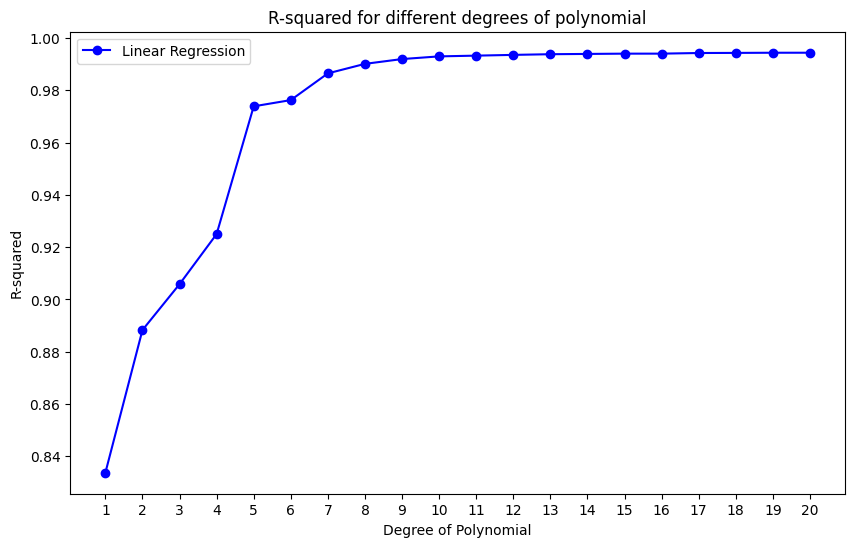

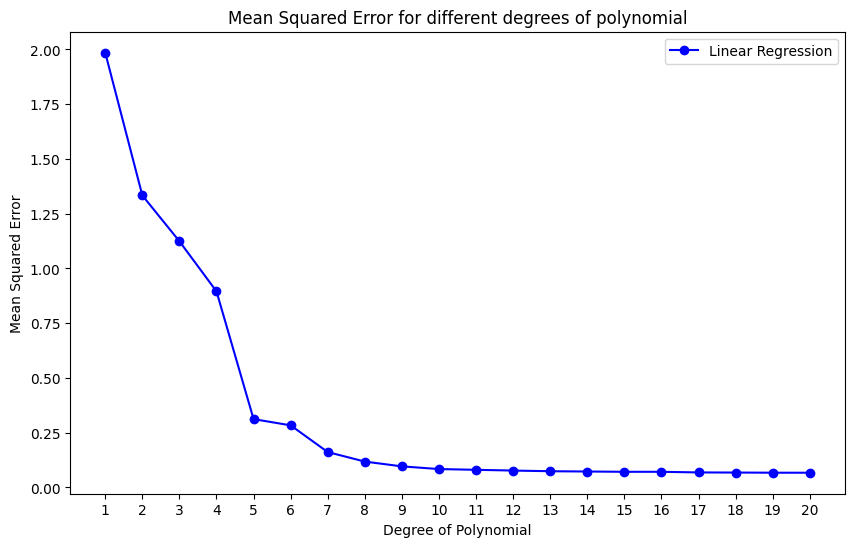

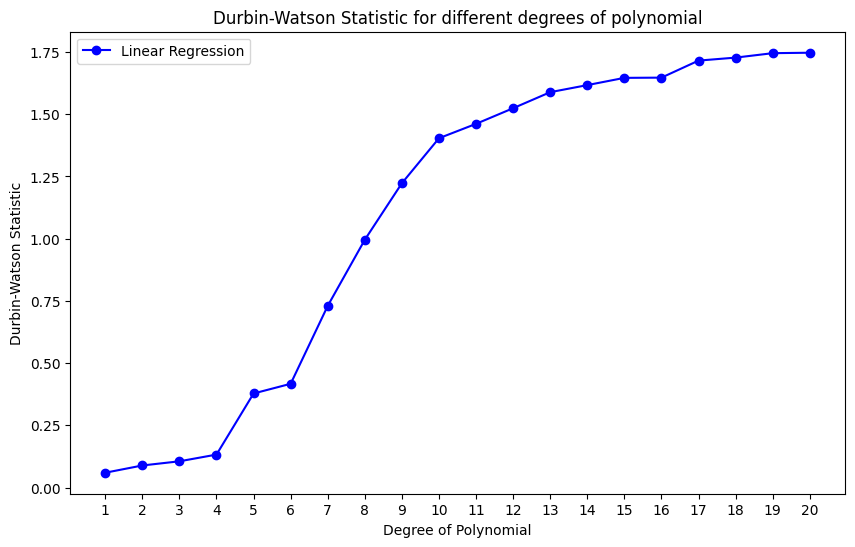

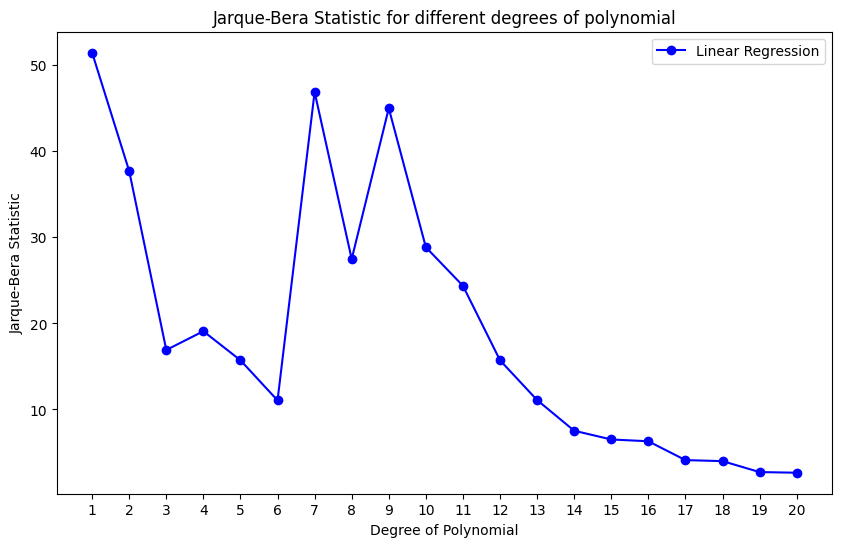

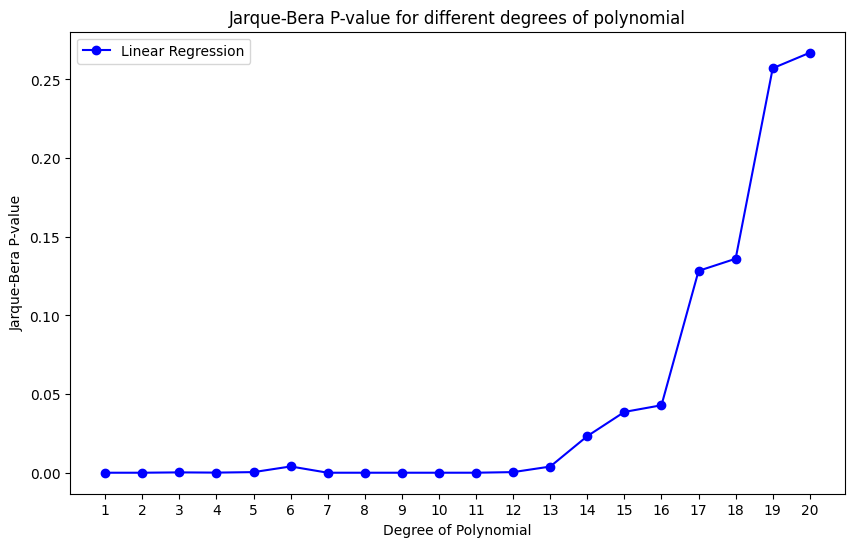

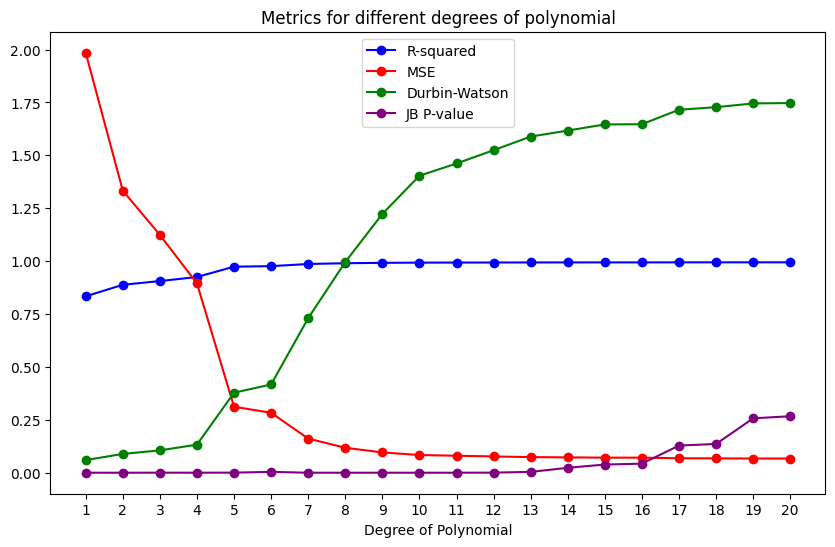

In [3]:
plt.figure(figsize=(10, 6))

# Plotting R-squared values for Linear Regression across different degrees
degrees = range(1, 21)
r_squared_values = [metric_table_train.loc['Linear Regression', f'R-squared-{i}'] for i in degrees]

# Plotting a line graph
plt.plot(degrees, r_squared_values, marker='o', color='blue', label='Linear Regression')

# Optional: Print R-squared values for each degree
# for i, r2 in zip(degrees, r_squared_values):
#     print(f'Degree {i} - R-squared: {r2}')

plt.xlabel('Degree of Polynomial')
plt.ylabel('R-squared')
plt.xticks(degrees)
plt.title('R-squared for different degrees of polynomial')
plt.legend()
# plt.grid()
plt.savefig('Images/R-squared.png', dpi=300)
plt.show()

plt.figure(figsize=(10, 6))

# Plotting MSE values for Linear Regression across different degrees
mse_values = [metric_table_train.loc['Linear Regression', f'MSE-{i}'] for i in degrees]

# Plotting a line graph
plt.plot(degrees, mse_values, marker='o', color='blue', label='Linear Regression')

# Optional: Print MSE values for each degree
# for i, mse in zip(degrees, mse_values):
#     print(f'Degree {i} - MSE: {mse}')

plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.xticks(degrees)
plt.title('Mean Squared Error for different degrees of polynomial')
plt.legend()
# plt.grid()
plt.savefig('Images/MSE.png', dpi=300)
plt.show()

plt.figure(figsize=(10, 6))

# Plotting Durbin-Watson values for Linear Regression across different degrees
durbin_watson_values = [metric_table_train.loc['Linear Regression', f'Durbin-Watson-{i}'] for i in degrees]

# Plotting a line graph
plt.plot(degrees, durbin_watson_values, marker='o', color='blue', label='Linear Regression')

# Optional: Print Durbin-Watson values for each degree
# for i, dw in zip(degrees, durbin_watson_values):
#     print(f'Degree {i} - Durbin-Watson: {dw}')

plt.xlabel('Degree of Polynomial')
plt.ylabel('Durbin-Watson Statistic')
plt.xticks(degrees)
plt.title('Durbin-Watson Statistic for different degrees of polynomial')
plt.legend()
# plt.grid()
plt.savefig('Images/Durbin-Watson.png', dpi=300)
plt.show()

plt.figure(figsize=(10, 6))

# Plotting Jarque-Bera values for Linear Regression across different degrees
jb_values = [metric_table_train.loc['Linear Regression', f'Jarque-Bera-{i}'] for i in degrees]

# Plotting a line graph
plt.plot(degrees, jb_values, marker='o', color='blue', label='Linear Regression')

# Optional: Print Jarque-Bera values for each degree
# for i, jb in zip(degrees, jb_values):
    # print(f'Degree {i} - Jarque-Bera: {jb}')

plt.xlabel('Degree of Polynomial')
plt.ylabel('Jarque-Bera Statistic')
plt.xticks(degrees)
plt.title('Jarque-Bera Statistic for different degrees of polynomial')
plt.legend()
# plt.grid()
plt.savefig('Images/Jarque-Bera.png', dpi=300)
plt.show()

plt.figure(figsize=(10, 6))

# Plotting JB P-values for Linear Regression across different degrees
jb_p_values = [metric_table_train.loc['Linear Regression', f'JB P-value-{i}'] for i in degrees]

# Plotting a line graph
plt.plot(degrees, jb_p_values, marker='o', color='blue', label='Linear Regression')

# Optional: Print JB P-values for each degree
# for i, jb_p in zip(degrees, jb_p_values):

#     print(f'Degree {i} - JB P-value: {jb_p}')

plt.xlabel('Degree of Polynomial')
plt.ylabel('Jarque-Bera P-value')
plt.xticks(degrees)
plt.title('Jarque-Bera P-value for different degrees of polynomial')
plt.legend()
# plt.grid()
plt.savefig('Images/JB-P-value.png', dpi=300)
plt.show()


# Show all the plots together in a single figure superimposed   

plt.figure(figsize=(10, 6))

# Plotting R-squared values for Linear Regression across different degrees
r_squared_values = [metric_table_train.loc['Linear Regression', f'R-squared-{i}'] for i in degrees]

# Plotting a line graph
plt.plot(degrees, r_squared_values, marker='o', color='blue', label='R-squared')

# Plotting MSE values for Linear Regression across different degrees
mse_values = [metric_table_train.loc['Linear Regression', f'MSE-{i}'] for i in degrees]

# Plotting a line graph
plt.plot(degrees, mse_values, marker='o', color='red', label='MSE')

# Plotting Durbin-Watson values for Linear Regression across different degrees
durbin_watson_values = [metric_table_train.loc['Linear Regression', f'Durbin-Watson-{i}'] for i in degrees]

# Plotting a line graph
plt.plot(degrees, durbin_watson_values, marker='o', color='green', label='Durbin-Watson')

# Plotting Jarque-Bera values for Linear Regression across different degrees
# jb_values = [metric_table_train.loc['Linear Regression', f'Jarque-Bera-{i}'] for i in degrees]

# Plotting a line graph
# plt.plot(degrees, jb_values, marker='o', color='orange', label='Jarque-Bera')

# Plotting JB P-values for Linear Regression across different degrees
jb_p_values = [metric_table_train.loc['Linear Regression', f'JB P-value-{i}'] for i in degrees]

# Plotting a line graph
plt.plot(degrees, jb_p_values, marker='o', color='purple', label='JB P-value')

plt.xlabel('Degree of Polynomial')
plt.xticks(degrees)
plt.title('Metrics for different degrees of polynomial')
plt.legend()
# plt.grid()
plt.savefig('Images/Metrics.png', dpi=300)
plt.show()

